# Quick start to CMS Open Data

This is a jupyter notebook, where you can have text "cells" (like this text here) and code "cells" i.e. boxes where you can write python code to be executed (like the one below). No need to install anything (if you run this on http://mybinder.org/) or find compilers, it is all done for you in background.

For the exercise with CMS open data, we use python as programming language: it is easy to get started, just type, for example, 1 + 1 in the cell below and click on "Run" icon above.

In [ ]:
1+1

Now try something more advanced, for example sqrt(4)

In [ ]:
sqrt(4)

That failed: basic python can do some operations but for anything more complex, we need additional software packages or "modules".

That's what we will import here (select the cell below and run it by clicking on the Run icon):

In [1]:
import pandas as pd 
#pandas is for data structures and data analysis tools
import numpy as np
#numpy is for scientific computing
import matplotlib.pyplot as plt
#matplotlib is for plotting

Now, you want to try whether sqrt(4) works now? No, it does not... you will have to tell jupyter that you want to take the function from numpy (which for brevity was named np above). So try np.sqrt(4)... 

In [ ]:
np.sqrt(4)

Note that you can modify this page at any time, it does no harm. You can add cells (Insert) and change their type from Code (default) to text (i.e. "Markdown") under Cell -> Cell type.

OK, let's get started with the data. We'll read the data from the CERN Open data portal. We call it "data" but you can use any other name.

In [2]:
# we use read_csv function from pandas to read the data into a "data frame"
data = pd.read_csv('http://cern.ch/opendata/record/545/files/Dimuon_DoubleMu.csv')

We'll have a look what we got in these data:

In [ ]:
data.head()

This is a dataset from http://opendata.cern.ch/record/545 on CERN Open Data Portal. It is a csv (comma separated values) file which can be easily used in many different frameworks. You can find other files of this type with [this search](http://opendata.cern.ch/search?page=1&size=20&q=&type=Dataset&experiment=CMS&subtype=Derived&file_type=csv).

What has been written in this dataset are the values (charge, direction, energy, momentum) of two muons from a CMS primary dataset http://opendata.cern.ch/record/17. All other particles have been omitted. If you're interested, the code and instructions for producing this kind of simplified datasets are in http://opendata.cern.ch/record/552

Now, if you brave enough you can compute the invariant mass for the two muons. If you are in a hurry, just use the value M, which has been computed for you already :-)

In [3]:
invariant_mass = data['M']

You can type the name of your new variable to see what went in there:

In [ ]:
invariant_mass

Now let's make a histogram

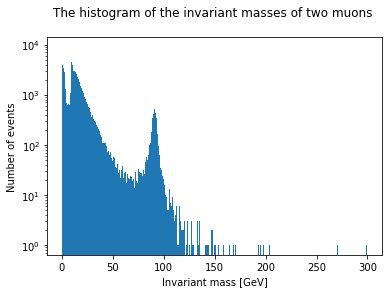

In [5]:
# Plot the histogram with the function hist() of the matplotlib.pyplot module:
# (http://matplotlib.org/api/pyplot_api.html?highlight=matplotlib.pyplot.hist#matplotlib.pyplot.hist).
# 'Bins' determines the number of the bins used.
plt.hist(invariant_mass, bins=500)

# Name the axises and give the title.
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('The histogram of the invariant masses of two muons \n') # \n creates a new line for making the title look better
# plt.yscale('log') 
# Show the plot.
plt.show()

You can check whether log scale looks better. Just edit the cell above, uncomment plt.yscale('log') before plt.show() and run it again.

Now zoom to see whether you can find some familiar particles in the dimuon spectrun. We can do that by setting the range of the histogram with option range=[min,max].

In [ ]:
plt.hist(invariant_mass, bins=200, range=[8,12])
plt.show()

Have a look at the very low invariant mass range as well (change the range limits in the cell above and run it again). You will be surprised to see how well some low mass particles are visible in our data!

We have compiled [a list of particles decaying into two muons](https://github.com/cms-opendata-education/cms-opendata-education/blob/master/Particle%20List%20with%20quark%20composition.pdf) (extracted for easier reading for educational purposes from C. Patrignani et al. (Particle Data Group), Chin. Phys. C, 40, 100001 (2016) and 2017 update.). In a teaching situation, you can ask students to identify these particles in the plot. 

Note that binder does not save your changes. To save your work, download it from File -> Download as -> Notebook. This saves a local copy to your computer (and has no effect on the original notebook).

### Some additional material

If you want to compute yourself the invariant mass from energy and momentum of the two muons, know that you can access the values out of our dataset by data.E1 and data.px1 etc. Remember that before every complex mathematical function you must define that it comes from the numpy package, which we imported and which we defined as np (e.g. np.sqrt(your_value)).

As an extra challenge, note that it happens that one value of the newly computed invariant mass squared goes below 0 (sorry, this is real data) so we will have to exclude that from our set of values before taking the square root... not that nice but a good occasion to show how you can very efficiently set a selection criteria in a dataset with "pandas" 

In [ ]:
mass_squared = (data.E1 + data.E2)**2 - ((data.px1 + data.px2)**2 +(data.py1 + data.py2)**2  +(data.pz1 + data.pz2)**2)
mass_squared_pos = mass_squared[(mass_squared >0)]

Now plot the invariant mass again to compare it with the histograms above. Did we get it right?

In [ ]:
plt.hist(np.sqrt(mass_squared_pos), bins=200, range=[8,12])
plt.show()

For more examples, have a look in https://github.com/cms-opendata-education. You are free to copy and modify these notebooks, and suggest new ones to be added to our collection. This material will also be available through CERN Open Data Portal.